## What Is Camera Calibration?
*****
**Geometric camera calibration, also referred to as camera resectioning, estimates the parameters of a lens and image sensor of an image or video camera. You can use these parameters to correct for lens distortion, measure the size of an object in world units, or determine the location of the camera in the scene. These tasks are used in applications such as machine vision to detect and measure objects. They are also used in robotics, for navigation systems, and 3-D scene reconstruction.**

#### • Extrinsic Parameters: define the location and orientation of the camera with respect to the world frame.

#### • Intrinsic Parameters: allow a mapping between camera coordinates and pixel coordinates in the image frame.

#### • Camera model in general is a mapping from world to image coordinates.

#### • This is a 3D to 2D transform and is dependent upon a number of independent parameters.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

In [4]:
objp.shape

(35, 3)

In [5]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane

In [6]:
images = cv2.imread("C:/Users/shrin/Downloads/chessBord.jpg")

# Augment

In [7]:
images.shape

(600, 800, 3)

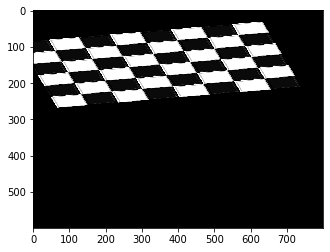

In [8]:
pts1 = np.float32([[0,0],[800,0],[0,600],[800,600]])
pts2 = np.float32([[0,0],[800,0],[0,600],[800,600]])


pts1 = np.float32([[50,50],[750,50],[50,550]])
pts2 = np.float32([[10,100],[600,50],[100,250]])

# prespescive
'''M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(images,M,(800,600))
'''
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(images,M,(800,600))
future = dst.copy()
plt.imshow(dst)

In [9]:
gray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (7,5),None)

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(dst, (7,5), corners2,ret)
    cv2.imshow('img',img)
    cv2.waitKey(50000)

cv2.destroyAllWindows()

In [10]:
print(objpoints, imgpoints)

[array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.]], dtype=float32)] [array([[[ 60.571762, 110.9521  ]],

       [[144.75668 , 104.04913 ]],

       [[229.30342 ,  96.85773 ]],

       [[313.59647 ,  90.118454]],

       [[397.98468 ,  82.677155]],

       [[482.05188 ,  75.70438 ]],

       [[566.43805 ,  68.27326

## It returns the camera matrix, distortion coefficients, rotation and translation vectors etc.

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [12]:
ret

0.19746918907868846

In [13]:
mtx

array([[1.86514280e+05, 0.00000000e+00, 4.01859441e+02],
       [0.00000000e+00, 6.63140313e+04, 2.97428050e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [14]:
dist

array([[-1.63115798e+02, -1.37818282e-02, -3.59886025e-01,
        -9.28126622e-02, -2.14326688e-07]])

In [15]:
rvecs
# rvecs is the rotation vector of the aruco under camera's coordinates system (same as above).

[array([[ 0.15825931],
        [-0.1497048 ],
        [-0.22075561]])]

In [16]:
tvecs 
# tvecs is the location vector (stored in a 3X1 matrix), 
# the coordinates x,y,z of the chessboard or aruco in camera's coordinates system, 
# which is z along optical axis, x to the right and y to the bottom)

[array([[  -3.90213013],
        [  -5.98448957],
        [2134.483767  ]])]

In [17]:
# ret = > 0.031533328929208425

# mtx = > array([[6.26213733e+03, 0.00000000e+00, 4.67119307e+02],
#       [0.00000000e+00, 6.26214622e+03, 3.25783758e+02],
#       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# dist = > array([[-4.63836515e-02,  9.19502820e+00, -2.46911763e-04,
#        -2.86053692e-04,  1.42002696e-01]])

# rvecs = > [array([[-4.91040393e-04],
#        [ 7.13806093e-04],
#        [-2.46604171e-06]])]

#tvecs => [array([[-3.67616703],
#        [-2.26266642],
#        [62.62249921]])]

In [18]:
img = future
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

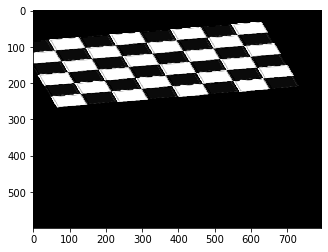

In [19]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
#cv2.imwrite('calibresult.png',dst)
plt.imshow(dst)

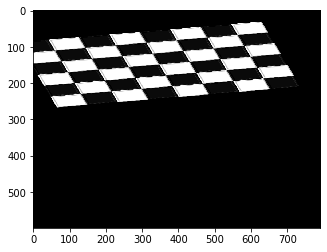

In [20]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

In [21]:
roi

(3, 0, 794, 599)

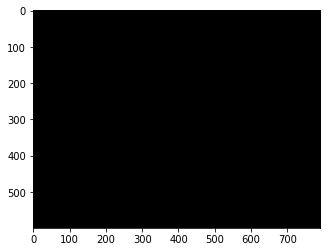

In [22]:
plt.imshow((dst-dst))

# xyz


In [23]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [24]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [25]:
ret, corners = cv2.findChessboardCorners(gray, (7,5),None)

if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

    # Find the rotation and translation vectors.
    _,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

    # project 3D points to image plane
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

    img = draw(img,corners2,imgpts)
    cv2.imshow('img',img)
    k = cv2.waitKey(0) & 0xff
    

cv2.destroyAllWindows()

In [26]:
corners.shape

(35, 1, 2)

In [27]:
print(imgpts)
print(imgpts[0].ravel())

[[[313.52524   89.82629 ]]

 [[114.57287  201.13705 ]]

 [[ 17.154892  98.28109 ]]]
[313.52524  89.82629]


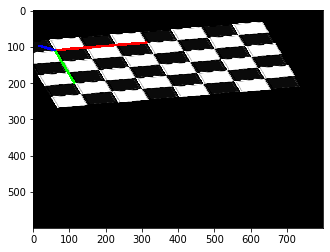

In [28]:
plt.imshow(img)

In [29]:
12498 -4000-500

7998

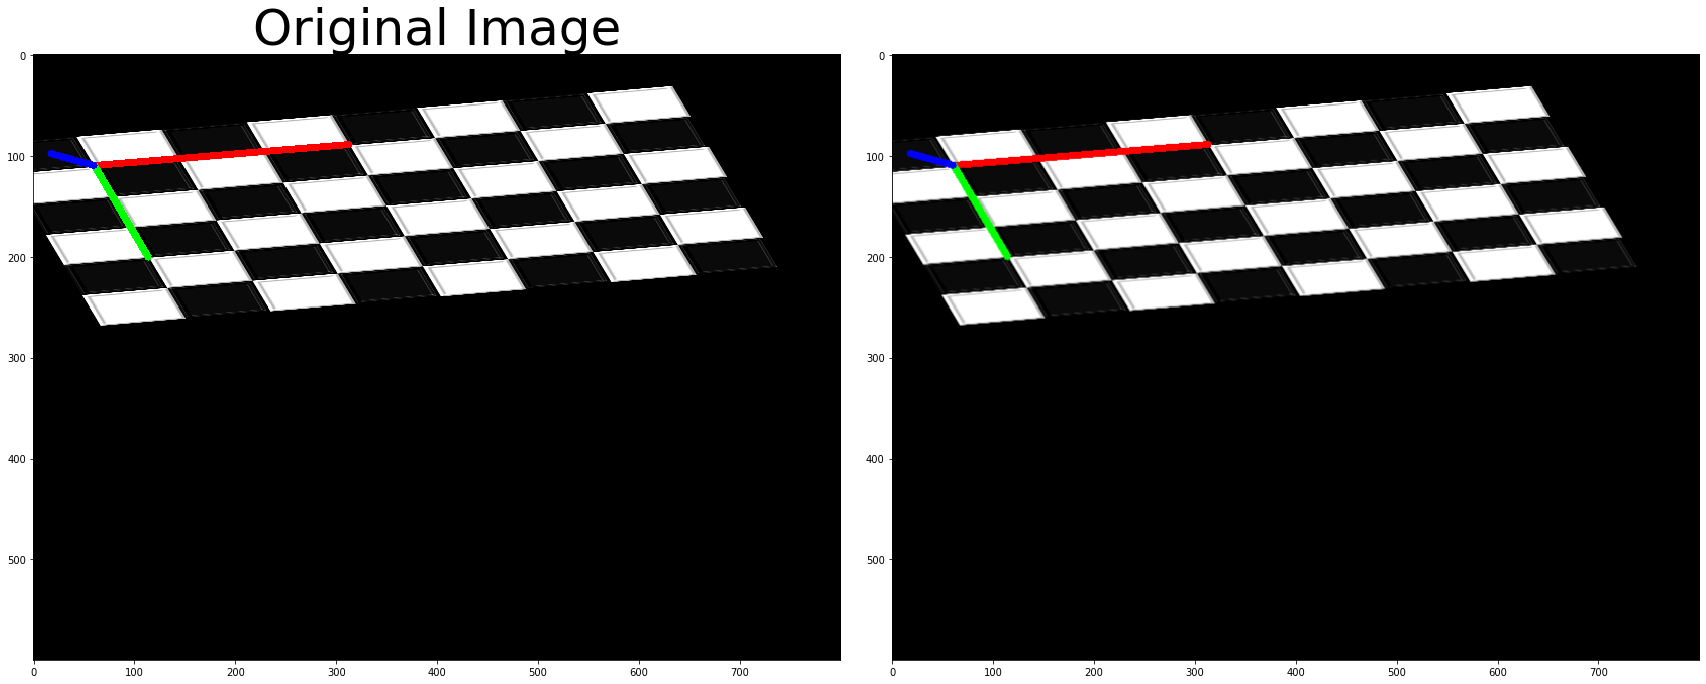

In [30]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(img, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)

# Live


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [3]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER  , 30, 0.001)

In [6]:
cap = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,50,250,cv2.THRESH_BINARY)
    ret, corners = cv2.findChessboardCorners(thresh, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(thresh,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(frame, (9,6), corners2,ret)
        
        # calibrate cam
        #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    
    
    cv2.imshow('threshold',thresh)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [8]:
print(len(imgpoints), len(objpoints))

1352 1352


In [9]:
#np.save("imgpoints.npy",imgpoints)

In [10]:
#np.save("objpoints.npy",objpoints)

frame = cv2.imread("C:/Users/shrin/Pictures/Camera Roll/WIN_20191114_15_22_21_Pro.jpg")

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,50,250,cv2.THRESH_BINARY)
ret, corners = cv2.findChessboardCorners(thresh, (9,6),None)

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(thresh,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(frame, (9,6), corners2,ret)

    # calibrate cam
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [ ]:
print(mtx,"matrx \n \n",dist,"distortion \n \n",rvecs,"rvec \n\n",tvecs,"tvecs\n")


In [ ]:
plt.imshow(frame)

In [ ]:
print(mtx,"matrx \n \n", dist,"distortion \n \n", rvecs,"rvec \n \n",tvecs,"tvecs\n")

In [ ]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(frame, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)

### caliberate

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane


#objpoints = list(np.load("objpoints.npy"))
#imgpoints = list(np.load("imgpoints.npy"))
#objpoints = objpoints[:1000:30]
#objpoints = imgpoints[:1000:30]

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER  , 30, 0.001)

In [6]:
os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

['WIN_20191114_15_38_44_Pro.jpg',
 'WIN_20191114_15_39_39_Pro.jpg',
 'WIN_20191114_15_40_01_Pro.jpg',
 'WIN_20191114_15_40_05_Pro.jpg',
 'WIN_20191114_15_40_15_Pro.jpg',
 'WIN_20191114_15_40_21_Pro.jpg']

In [7]:
pathTtoimg = "C:/Users/shrin/Pictures/Camera Roll/img/"
imgs = os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

for frm in imgs:
    frame = cv2.imread(pathTtoimg+frm)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,50,250,cv2.THRESH_BINARY)
    ret, corners = cv2.findChessboardCorners(thresh, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(thresh,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(frame, (9,6), corners2,ret)
        
        # calibrate cam
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
        

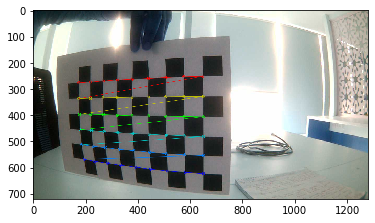

In [8]:
plt.imshow(frame)

Text(0.5, 1, 'undistorted')

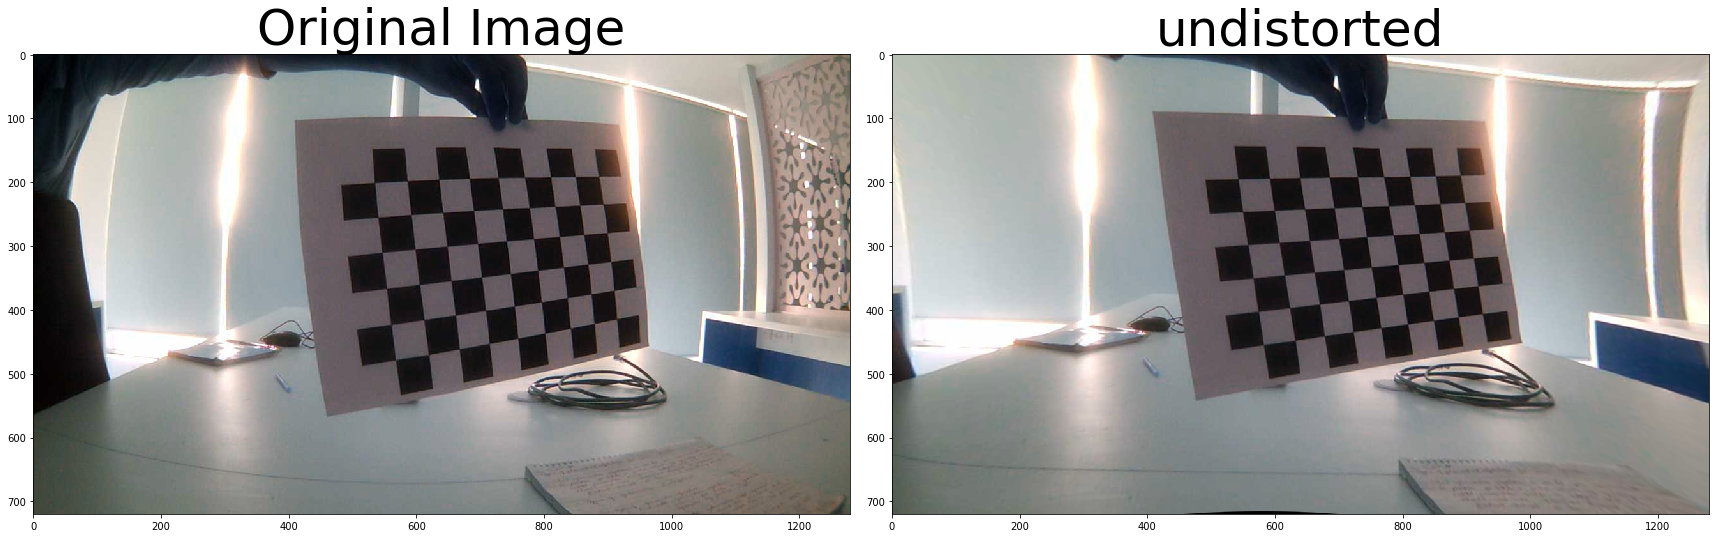

In [9]:
frame = cv2.imread(pathTtoimg+imgs[3])
#frame = cv2.imread("C:/Users/shrin/Documents/Abhilash/PICT0227.jpg")
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(frame, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(frame)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('undistorted',fontsize = 50)

In [11]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [14]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [15]:
_,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
# project 3D points to image plane
imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
img = draw(frame,corners2,imgpts)
cv2.imshow('img',img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    undistorted = cal_undistort(frame, objpoints, imgpoints)
    cv2.imshow('frame',frame)
    cv2.imshow("undistorted",undistorted)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
objpoints

In [ ]:
len(imgpoints[0])

In [ ]:
cv2.calibrationMatrixValues(mtx,(frame.shape[0],frame.shape[1]),2.5,2.5)

In [ ]:
fovx, fovy, focalLength, principalPoint, aspectRatio = 